# Leanear Regression using Gradient Descent

$y = mx + b$

<img src="./Images/slope-intercept-form.png" />

<img src="./Images/only_gold.png" />

<img src="./Images/Final_output.png"/>

<img src="./Images/SumOfSquare.png" />

<img src="./Images/gradient_descent_error_surface.png" /> 

<img src="./Images/sum_of_square_gradient.png" />

 b =  4.883462819066873  m =  146.503884572006
 predicted price is  5132.5194228392775


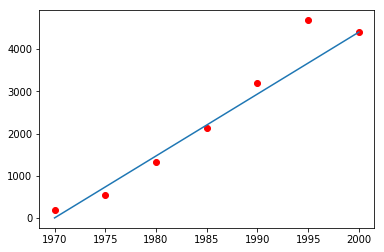

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#For plotiing the line on the graph
def plotLines(b,m,axs,xi):
    y = (np.array(np.array(xi)*m) + b)
    plt.plot(np.array(axs),y)
#For prediction of next price
def predict_next_price(b,m,x):
    return (x*m + b)
#Minimizing the loss using gradienct descent algorithm
def calculate_gradient_descent(x,y,learning_rate,iterations):
    b = 0 #initial value of Y intercept
    m = 0 #initial valur of slope of line
    for iter_no in range(iterations): #going through all the data points multiple times
        for i in range(len(x)):
            b_gradient = 0
            m_gradient = 0
            x_current = x[i]
            y_current = y[i]
            N = len(x)
            #formula for the partial derivative of error function with respect to b
            b_gradient += -(2/N) * (y_current - ((m * x_current)+b)) 
            #formula for the partial derivative of error function with respect to m
            m_gradient += -(2/N) * x_current * (y_current - ((m * x_current)+b))
        #updating the values
        b -= (learning_rate * b_gradient) 
        m -= (learning_rate * m_gradient)
    plotLines(b,m,np.array(x)+1970,x)
    return [b,m]

def run():
    #reading from csv file
    year_price = pd.read_csv('GoldPricesIndia.csv')

    axs = np.array(year_price["year"])
    #plotting the datapoints
    plt.plot(axs,"price","ro",data=year_price)
    axs = np.array(axs) - 1970
    #no. of times we have to go through data points
    epochs = 1000

    #here x_point,y_point - co-ordinates of the points from the dataset
    #How fast the values should be updated
    learning_rate = 0.0001
    [b,m] = calculate_gradient_descent(np.array(axs), year_price["price"] ,learning_rate, epochs)
    print(" b = ",b," m = ",m)
    #For prediction
    pred_year = 2005
    pred_price = predict_next_price(b,m,pred_year-1970)
    print(" predicted price is ",pred_price)

run()
